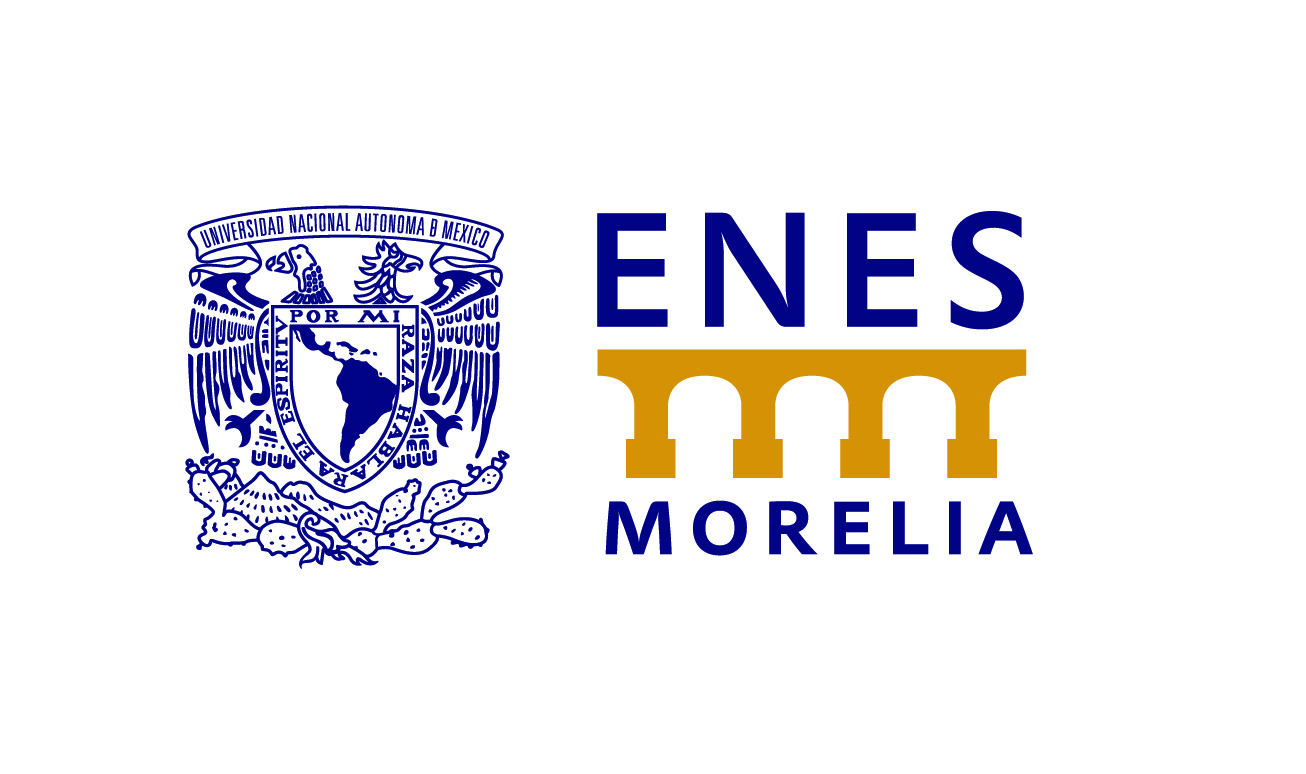
<h2><center>Licenciatura en Tecnologías para la Información en Ciencias</center></h2>
<h2><center>Procesamiento de Imagenes</center></h2>
<h2><center>Tarea 3: Mejoramiento de la imagen y detección de bordes</center></h2>
<h2><center>Luis David Huante García</center></h2>
<h2><center>Matrícula: 420138905</center></h2>
<h2><center>A 25 de septiembre de 2023</center></h2>

## 1. Investigar los filtros siguientes:
  * **Suavizado gaussiano.**
  * **Constrast Limited Adaptative Histogram Ecualization (CLAHE).**
  * **Canny.**

1. **Filtro de Suavizado Gaussiano:**

  El filtro de suavizado gaussiano se utiliza para reducir el ruido y suavizar una imagen. Su principio básico es aplicar una operación de convolución con un kernel (máscara) gaussiano sobre la imagen. El filtro se llama "gaussiano" porque utiliza una distribución gaussiana para calcular los pesos de la convolución. Los píxeles de la imagen original se promedian ponderadamente según la distribución gaussiana, lo que da como resultado una imagen suavizada en la que el ruido se reduce.

  

2. **Contrast Limited Adaptive Histogram Equalization (CLAHE):**
  El CLAHE es una técnica utilizada para mejorar el contraste local en una imagen. A diferencia de la ecualización de histograma tradicional, que opera en toda la imagen, el CLAHE divide la imagen en regiones pequeñas y aplica la ecualización de histograma en cada una de ellas de forma adaptativa. Esto significa que el contraste se mejora localmente, lo que puede ser útil para realzar características en regiones específicas de la imagen. Además, el "Contrast Limited" se refiere al hecho de que se aplica una limitación al aumento del contraste para evitar problemas de sobreexposición.

3.  **Operador de Canny:**

  El operador de Canny es una técnica ampliamente utilizada para la detección de bordes en una imagen. Se compone de varios pasos:

  1.  Suavizado: Inicialmente, la imagen se suaviza utilizando un filtro gaussiano para reducir el ruido.

  2. Cálculo del gradiente: Luego, se calcula el gradiente de la imagen para determinar la dirección y la magnitud del cambio de intensidad en cada píxel.

  3. Supresión de no máximos: Se realiza una supresión de no máximos para eliminar los píxeles que no son máximos en la dirección del gradiente, lo que resulta en una imagen de bordes más delgados.

  4. Umbralización por histéresis: Finalmente, se aplican dos umbrales (umbral alto y bajo) para determinar qué píxeles son considerados como bordes. Los píxeles con intensidades por encima del umbral alto se consideran bordes fuertes, mientras que los píxeles con intensidades entre el umbral alto y el umbral bajo se consideran bordes débiles. Los bordes débiles se pueden considerar bordes si están conectados a bordes fuertes.

## 2. Implementa el filtro de Suavizado gaussiano explicando paso a paso.

Suavizado gaussiano

Como sabemos, el desenfoque gaussiano (también conocido como suavizado gaussiano) es lo mismo que convolucionar la imagen con una función gaussiana. Podemos crear entonces una función para generar un kernel gaussiano, para aplicarlo posteriormente a la imagen:

In [ ]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) *
                      np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

Aquí se implementa una función llamada `gaussian_kernel(size, sigma)` que genera un kernel Gaussiano en forma de matriz NumPy. El código crea una matriz de coordenadas `x` e `y` basada en el tamaño especificado `(size)` y calcula un kernel Gaussiano bidimensional centrado en el valor medio. Luego, normaliza el kernel para asegurar que la suma de todos sus valores sea igual a 1, lo que garantiza un efecto de suavizado consistente cuando se aplica a una imagen.

Ahora, podemos aplicar el kernel:

In [ ]:
def apply_gaussian_blur(image, kernel_size, sigma):
    # Obtenemos las dimensiones de la imagen
    height, width = image.shape

    # Creamos un kernel Gaussiano
    kernel = gaussian_kernel(kernel_size, sigma)

    # Inicializamos una imagen suavizada
    smoothed_image = np.zeros_like(image)

    # Aplicamos el kernel Gaussiano a la imagen
    for i in range(height):
        for j in range(width):
            # Obtenemos la región de la imagen que coincide con el kernel
            region = image[max(0, i - kernel_size // 2):min(height, i + kernel_size // 2 + 1),
                           max(0, j - kernel_size // 2):min(width, j + kernel_size // 2 + 1)]

            # Verificamos las dimensiones de la región
            kh, kw = region.shape

            # Aplicamos la convolución entre la región y el kernel
            smoothed_image[i, j] = np.sum(region * kernel[:kh, :kw])

    return smoothed_image

Ahora, la función `apply_gaussian_blur` aplica el filtro de Suavizado Gaussiano a una imagen. El proceso es el siguiente:

  1. Obtiene las dimensiones (altura y ancho) de la imagen de entrada.
  2. Crea un kernel Gaussiano utilizando la función `gaussian_kernel`, especificando el tamaño del `kernel` y la desviación estándar (`sigma`).
  3. Inicializa una nueva imagen vacía del mismo tamaño que la imagen original para almacenar la imagen suavizada.
  4. Itera a través de cada píxel en la imagen original.
  5. Para cada píxel, crea una región alrededor de él que coincide con el tamaño del kernel.
  6. Aplica la convolución entre la región y el kernel Gaussiano.
  7. Almacena el resultado de la convolución en la imagen suavizada en la misma posición que el píxel original.
  8. Retorna la imagen suavizada después de procesar todos los píxeles.

In [ ]:
# Ejemplo
image = plt.imread('figura6.jpg')
image = (image * 255).astype(np.uint8)

# Parámetros del kernel Gaussiano
kernel_size = 5  # Tamaño del kernel
sigma = 1.0

# Aplicación  del filtro de Suavizado Gaussiano
smoothed_image = apply_gaussian_blur(image, kernel_size, sigma)

## 3. Realiza el pseudocódigo de los filtros CLAHE y de Canny.

Contrast Limited Adaptive Histogram Equalization (CLAHE):

In [ ]:
Función calcularCDF(histograma):
    # Calculamos el CDF a partir del histograma
    cdf = Array(tamañoDelHistograma)
    suma = 0
    Para cada valor en el histograma:
        suma += valor
        cdf[valor] = suma

    Devolver cdf

Función ecualizarHistogramaLocal(píxel, histograma, umbral):
    # Calculamos la función de distribución acumulativa (CDF) del histograma
    cdf = calcularCDF(histograma)

    # Aplicamos ecualización solo si el CDF está por debajo del umbral
    Si cdf[píxel] <= umbral:
        píxel_ecualizado = cdf[píxel] * valorMáximoIntensidad
    Sino:
        píxel_ecualizado = píxel

    Devolver píxel_ecualizado


Función calcularHistogramaEnBloque(imagen, píxel, tamañoBloque):
    # Creamos un histograma vacío
    histograma = Array(tamañoDelHistograma)

    # Recorremos el bloque alrededor del píxel y contar los valores de intensidad
    Para cada píxel en el bloque:
        valor = imagen[píxel]
        histograma[valor]++

    Devolver histograma


Función calcularCLAHE(imagen, tamañoBloque, umbral):
    Para cada píxel en la imagen:
        # Calculamos el histograma en el bloque vecino
        histograma = calcularHistogramaEnBloque(imagen, píxel, tamañoBloque)

        # Aplicamos la ecualización de histograma local
        imagen[píxel] = ecualizarHistogramaLocal(imagen[píxel], histograma, umbral)

    Devolver imagen

Operador de Canny:

In [ ]:
Función aplicarCanny(imagen, umbralAlto, umbralBajo):
    # Suavizamos la imagen con un filtro Gaussiano
    imagenSuavizada = aplicarFiltroGaussiano(imagen)

    # Calculamos el gradiente de la imagen
    gradienteX, gradienteY = calcularGradiente(imagenSuavizada)

    # Calculamos la magnitud y dirección del gradiente
    magnitudGradiente = calcularMagnitud(gradienteX, gradienteY)
    direcciónGradiente = calcularDirección(gradienteX, gradienteY)

    # Supresión de no máximos
    imagenConBordes = supresiónNoMáximos(magnitudGradiente, direcciónGradiente)

    # Umbralización por histéresis
    imagenFinal = umbralizaciónHistéresis(imagenConBordes, umbralAlto, umbralBajo)

    Devolver imagenFinal

## 4. Investiga cómo aplicar los filtros 1.2 y 1.3 utilizando OpenCV.

CLAHE

Para aplicar CLAHE en OpenCV, primero debemos convertir la imagen a escala de grises y luego utilizar la función `cv2.createCLAHE()` junto con apply():

In [ ]:
# Cargar la imagen en escala de grises
img = cv.imread('tsukuba_l.png', cv.IMREAD_GRAYSCALE)

# Aplicar CLAHE
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img, 100, 200)

El segundo y tercer argumentos son los minVal y maxVal respectivamente en cv.Canny. El cuarto argumento es el aperture_size. Es el tamaño del núcleo Sobel utilizado para encontrar los gradientes de la imagen.

Operador de filtro del operador de Canny:

In [ ]:
# Cargar la imagen en escala de grises
imagen_gris = cv.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el operador de Canny
imagen_bordes = cv.Canny(imagen_suavizada, umbral_bajo, umbral_alto)

### 5. Aplica los filtros 1.1 al 1.3 a las imágenes figura6.jpg, figura7.jpg, figura8.jpg y figura9.png.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

Aplicación de suavizado Gaussiano

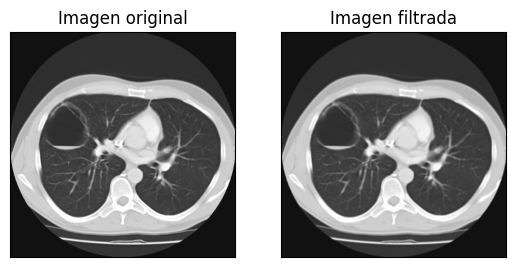

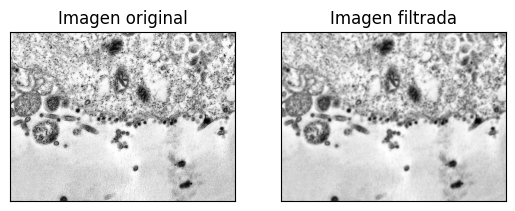

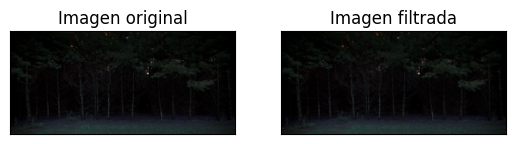

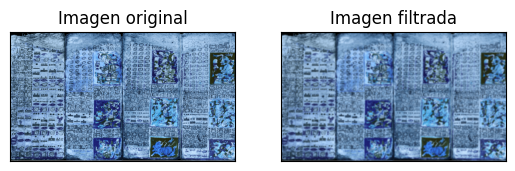

In [ ]:
#Lista de imagenes
images = ['figura6.jpg','figura7.jpg','figura8.jpg','figura9.png']

#Aplicación de filtro gaussiano
for img in images:
  img = cv.imread(img)
  blur = cv.GaussianBlur(img,(5,5),1000)
  plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title('Imagen original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(blur, cmap = 'gray'), plt.title('Imagen filtrada')
  plt.xticks([]), plt.yticks([])
  plt.show()

Aplicación de CLAHE:

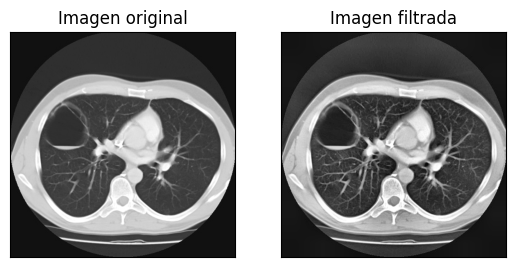

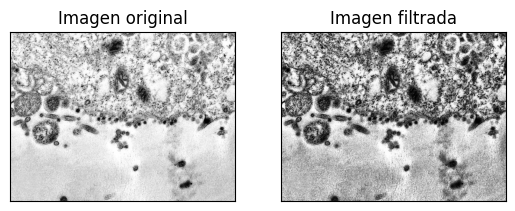

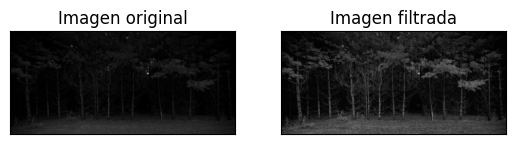

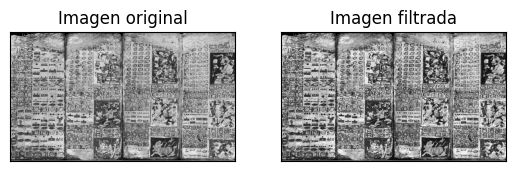

In [ ]:
#Lista de imagenes
images = ['figura6.jpg','figura7.jpg','figura8.jpg','figura9.png']

#Aplicación de filtro gaussiano
for img in images:
  img = cv.imread(img, cv.IMREAD_GRAYSCALE)
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(img)
  plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title('Imagen original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cl1, cmap = 'gray'), plt.title('Imagen filtrada')
  plt.xticks([]), plt.yticks([])
  plt.show()

Aplicación de Canny

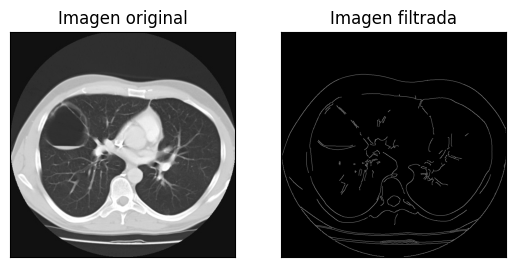

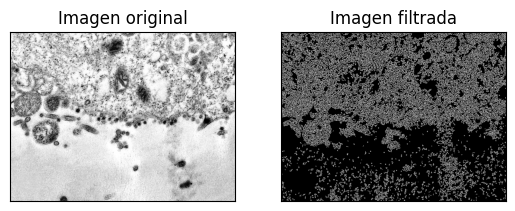

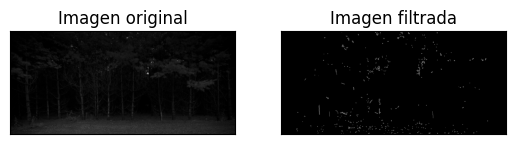

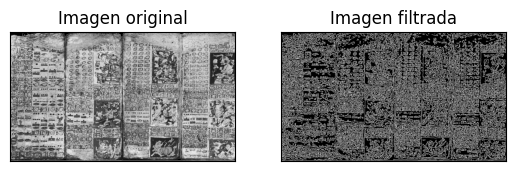

In [ ]:
#Lista de imagenes
images = ['figura6.jpg','figura7.jpg','figura8.jpg','figura9.png']

#Aplicación de filtro gaussiano
for img in images:
  img = cv.imread(img, cv.IMREAD_GRAYSCALE)
  edges = cv.Canny(img,100,200)
  plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title('Imagen original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(edges, cmap = 'gray'), plt.title('Imagen filtrada')
  plt.xticks([]), plt.yticks([])
  plt.show()

## Conclusiones

La implementación de los filtros de Suavizado Gaussiano, Contrast Limited Adaptive Histogram Equalization (CLAHE) y el operador de Canny en procesamiento de imágenes fue ampliamente útil para conocer a profundidad su funcionamiento y aplicaciones.



En primer lugar, la aplicación del Suavizado Gaussiano ha demostrado ser eficaz para reducir el ruido en las imágenes. Este filtro es ampliamente utilizado en tareas de preprocesamiento y mejora la calidad de las imágenes antes de aplicar algoritmos más avanzados. Su versatilidad radica en su capacidad para controlar el nivel de suavizado mediante la elección del tamaño del kernel y la desviación estándar. Sin embargo, la elección de parámetros adecuados puede ser un desafío, ya que un suavizado excesivo puede eliminar detalles importantes.

Por otro lado, la implementación de CLAHE ha destacado su capacidad para mejorar el contraste local en imágenes. Este filtro es particularmente útil en aplicaciones donde se necesita realzar características locales sin afectar el conjunto de la imagen. Por ejemplo, en imágenes médicas, CLAHE puede mejorar la visibilidad de estructuras anatómicas. Sin embargo, es importante controlar el límite de contraste para evitar efectos no deseados, como la sobreexposición.



Por último, la aplicación del operador de Canny para la detección de bordes ha demostrado ser una técnica valiosa para identificar transiciones significativas de intensidad en una imagen. Este operador es esencial en tareas como la detección de contornos y objetos. Sin embargo, encontrar los umbrales adecuados para la umbralización histéresis puede ser un desafío y puede requerir ajustes empíricos.

La implementación de estos filtros ha proporcionado una comprensión más profunda de cómo se pueden mejorar y analizar imágenes en diversas aplicaciones. Los desafíos incluyen la elección de parámetros óptimos y la adaptación a las características específicas de las imágenes. En general, estos filtros son herramientas esenciales en el procesamiento de imágenes y visión por computadora, y su dominio es fundamental para obtener resultados precisos y efectivos en proyectos relacionados con imágenes.